# Nubank Data Challenge - Exploratory Analysis

TODO: Intro and conclusion

In [1]:
%%capture

""" Useful notebook definitions

Some usefull notebook definitions, like plots color scheme
and cell behavior were extracted to another notebook just
for a cleaner view
"""
%run ./notebook_utils.ipynb

n_cores = cpu_count()

default_color = 'purple'
default_light_color = 'white'
default_dark_color = 'rebeccapurple'
colormap = 'BuPu'

In [2]:
def plot_count(df, col, null_replace='NULL', x_adjust=0, y_adjust=0.45):
    plt.figure(figsize=(15,5))
    ax = sns.countplot(y=col, data=df.fillna(null_replace))
    print(ax)
    for p in ax.patches:
        count = p.get_width()
        percent = 100 * count / len(df[col])

        axis_init = 0 if p.get_width() < x_adjust + 500 else x_adjust
        color = default_dark_color if axis_init == 0 else default_light_color
        ax.annotate('{} - ({:.2f}%)'.format(count, percent),
                    (p.get_width() - axis_init, p.get_y() + y_adjust), 
                    color=color)

In [3]:
def plot_count_v(df, col, null_replace='NULL', x_adjust=0, y_adjust=0.45):
    plt.figure(figsize=(15,5))
    ax = sns.countplot(col, data=df.fillna(null_replace))
    ax.set_xticklabels(ax.get_xticklabels(), rotation=45)
    print(ax)
    for p in ax.patches:
        count = p.get_width()
        percent = 100 * count / len(df[col])

        axis_init = 0 if p.get_width() < x_adjust + 500 else x_adjust
        color = default_dark_color if axis_init == 0 else default_light_color
        ax.annotate('{} - ({:.2f}%)'.format(count, percent),
                    (p.get_x() - axis_init, p.get_width() + y_adjust), 
                    color=color)

## 0- Importing data and first look

In [4]:
new_data_path = '../data/interim/'

In [5]:
acquisition_df_name = new_data_path + 'acquisition_train.csv'

spend_df_name = new_data_path + 'spend_train.csv'

### 0.1- Acquisition data

In [6]:
acquisition = pd.read_csv(acquisition_df_name)
acquisition.shape
acquisition.info()
acquisition.describe()
acquisition.head()

(45000, 57)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45000 entries, 0 to 44999
Data columns (total 57 columns):
Unnamed: 0                                          45000 non-null int64
ids                                                 45000 non-null object
target_default                                      41741 non-null object
score_1                                             44438 non-null object
score_2                                             44438 non-null object
score_3                                             44438 non-null float64
score_4                                             45000 non-null float64
score_5                                             45000 non-null float64
score_6                                             45000 non-null float64
risk_rate                                           44438 non-null float64
last_amount_borrowed                                15044 non-null float64
last_borrowed_in_months                             15044 non-null float

,Unnamed: 0,score_3,score_4,score_5,score_6,risk_rate,last_amount_borrowed,last_borrowed_in_months,credit_limit,income,ok_since,n_bankruptcies,n_defaulted_loans,n_accounts,n_issues,application_time_in_funnel,external_data_provider_credit_checks_last_2_year,external_data_provider_credit_checks_last_month,external_data_provider_credit_checks_last_year,external_data_provider_email_seen_before,external_data_provider_fraud_score,reported_income,shipping_zip_code,member_since,total_spent,total_revolving,total_minutes,total_card_requests,total_months,total_revolving_months,total_months_spent_too_much,total_revolving_min_months,max_revolving_months_in_a_row,max_revolving_min_months_in_a_row,credit_line
count,45000.00,44438.00,45000.00,45000.00,45000.00,44438.00,15044.00,15044.00,31200.00,44438.00,18455.00,44303.00,44426.00,44438.00,33456.00,45000.00,22372.00,45000.00,29876.00,42767.00,45000.00,45000.00,45000.00,45000.00,45000.00,45000.00,45000.00,45000.00,45000.00,45000.00,45000.00,45000.00,45000.00,45000.00,45000.00
mean,22499.50,347.98,100.01,0.50,99.93,0.30,13782.34,41.76,34381.95,71607.39,35.07,0.08,0.00,10.70,11.07,247.54,0.00,1.50,0.50,12.53,500.40,inf,33923.51,14.20,62730.38,10485.41,60.83,2.02,21.80,14.99,0.00,1.23,0.01,0.00,6441.68
std,12990.53,110.43,3.18,0.29,10.02,0.10,8077.57,10.25,36586.98,51858.97,21.66,0.27,0.08,4.59,4.60,146.12,0.00,1.11,0.50,126.53,287.97,nan,12692.41,8.62,55683.17,10782.67,38.93,1.07,8.62,6.35,0.00,1.19,0.11,0.00,4556.10
min,0.00,0.00,86.19,0.00,60.66,0.00,1005.18,36.00,0.00,4821.18,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,-999.00,0.00,403.00,12001.00,0.00,36.89,0.00,0.00,1.00,3.00,0.00,0.00,0.00,0.00,0.00,506.00
25%,11249.75,270.00,97.87,0.25,93.20,0.22,7519.50,36.00,10000.00,45010.78,17.00,0.00,0.00,7.00,8.00,120.00,0.00,1.00,0.00,11.00,252.00,50948.25,22937.00,7.00,22840.29,2883.60,31.04,1.00,15.00,10.00,0.00,0.00,0.00,0.00,2949.00
50%,22499.50,340.00,100.02,0.50,99.97,0.29,12023.47,36.00,25647.00,61266.76,32.00,0.00,0.00,10.00,10.00,248.00,0.00,2.00,1.00,27.00,503.00,101779.00,33896.00,14.00,45723.25,6945.92,55.82,2.00,22.00,15.00,0.00,1.00,0.00,0.00,5302.00
75%,33749.25,420.00,102.14,0.75,106.64,0.36,19220.27,36.00,47086.75,86019.23,50.00,0.00,0.00,13.00,14.00,375.00,0.00,2.00,1.00,43.00,747.00,151337.25,44910.00,21.00,84851.98,14562.21,84.84,3.00,29.00,20.00,0.00,2.00,0.00,0.00,8737.00
max,44999.00,990.00,113.98,1.00,142.19,0.90,35059.60,60.00,448269.00,5000027.83,141.00,5.00,5.00,49.00,49.00,500.00,0.00,3.00,1.00,59.00,1000.00,inf,56000.00,33.00,402947.54,105981.21,274.26,9.00,36.00,33.00,0.00,9.00,1.00,0.00,20484.00


,Unnamed: 0,ids,target_default,score_1,score_2,score_3,score_4,score_5,score_6,risk_rate,last_amount_borrowed,last_borrowed_in_months,credit_limit,reason,income,facebook_profile,state,zip,channel,job_name,real_state,ok_since,n_bankruptcies,n_defaulted_loans,n_accounts,n_issues,application_time_applied,application_time_in_funnel,email,external_data_provider_credit_checks_last_2_year,external_data_provider_credit_checks_last_month,external_data_provider_credit_checks_last_year,external_data_provider_email_seen_before,external_data_provider_first_name,external_data_provider_fraud_score,lat_lon,marketing_channel,profile_phone_number,reported_income,shipping_state,shipping_zip_code,profile_tags,user_agent,target_fraud,class,member_since,total_spent,total_revolving,total_minutes,total_card_requests,total_months,total_revolving_months,total_months_spent_too_much,total_revolving_min_months,max_revolving_months_in_a_row,max_revolving_min_months_in_a_row,credit_line
0,0,343b7e7b-2cf8-e508-b8fd-0a0285af30aa,False,1Rk8w4Ucd5yR3KcqZzLdow==,IOVu8au3ISbo6+zmfnYwMg==,350.00,101.80,0.26,108.43,0.40,25033.92,36.00,0.00,mLVIVxoGY7TUDJ1FyFoSIZi1SFcaBmO01AydRchaEiGYtU...,65014.12,True,sjJbkqJS7cXalHLBFA+EOQ==,Ernn+uVXCMq/6ARrBCcd+A==,NCqL3QBx0pscDnx3ixKwXg==,mLVIVxoGY7TUDJ1FyFoSIZi1SFcaBmO01AydRchaEiGYtU...,N5/CE7lSkAfB04hVFFwllw==,nan,0.00,0.00,18.00,18.00,07:52:34,444,outlook.com,nan,2,0.00,51.00,leidelaura,645,"(-29.151545708122246, -51.1386461804385)",Invite-email,514-9840782,57849.00,BR-MT,17528,"{'tags': ['n19', 'n8']}",Mozilla/5.0 (Linux; Android 6.0.1; SGP771 Buil...,NaN,C,8,23894.61,4205.69,18.89,1,28,19,0,1,0,0,1995
1,1,bc2c7502-bbad-0f8c-39c3-94e881967124,False,DGCQep2AE5QRkNCshIAlFQ==,SaamrHMo23l/3TwXOWgVzw==,370.00,97.06,0.94,92.00,0.24,nan,nan,39726.00,mLVIVxoGY7TUDJ1FyFoSIZi1SFcaBmO01AydRchaEiGYtU...,100018.91,False,xsd3ZdsI3356I3xMxZeiqQ==,rlWIXTBO+VOa34+SpGyhlQ==,NCqL3QBx0pscDnx3ixKwXg==,mLVIVxoGY7TUDJ1FyFoSIZi1SFcaBmO01AydRchaEiGYtU...,N5/CE7lSkAfB04hVFFwllw==,50.00,0.00,0.00,14.00,14.00,02:34:29,346,gmail.com,0.00,1,0.00,17.00,diocezio,243,"(-19.687710705798963, -47.94151536525154)",Radio-commercial,251-3659293,4902.00,BR-RS,40933,"{'tags': ['n6', 'n7', 'nim']}",Mozilla/5.0 (Linux; Android 5.0.2; SAMSUNG SM-...,NaN,C,11,31435.08,5147.86,46.86,2,25,16,0,1,0,0,2766
2,2,669630dd-2e6a-0396-84bf-455e5009c922,True,DGCQep2AE5QRkNCshIAlFQ==,Fv28Bz0YRTVAT5kl1bAV6g==,360.00,100.03,0.35,112.89,0.29,7207.92,36.00,nan,mLVIVxoGY7TUDJ1FyFoSIZi1SFcaBmO01AydRchaEiGYtU...,65023.65,NaN,Ygq6MsM98oC8yceExr69Ig==,PjTIDfJsK0DKL9fO7vuW2g==,NCqL3QBx0pscDnx3ixKwXg==,mLVIVxoGY7TUDJ1FyFoSIZi1SFcaBmO01AydRchaEiGYtU...,n+xK9CfX0bCn77lClTWviw==,nan,0.00,0.00,10.00,nan,00:60:02,6,gmail.com,nan,2,nan,9.00,veralucia,65,"(-28.748023890412284, -51.867279334353995)",Waiting-list,230-6097993,163679.00,BR-RR,50985,"{'tags': ['n0', 'n17', 'nim', 'da']}",Mozilla/5.0 (Linux; Android 6.0.1; SGP771 Buil...,NaN,C,25,6976.90,2013.24,19.98,3,11,7,0,1,0,0,2537
3,3,d235609e-b6cb-0ccc-a329-d4f12e7ebdc1,False,1Rk8w4Ucd5yR3KcqZzLdow==,dCm9hFKfdRm7ej3jW+gyxw==,510.00,101.60,0.99,94.90,0.32,nan,nan,54591.00,mLVIVxoGY7TUDJ1FyFoSIZi1SFcaBmO01AydRchaEiGYtU...,68830.01,False,KET/Pmr6rHp1RJ/P9ymztw==,Cc/kWDLQH3dpHv5HU+pLVA==,NCqL3QBx0pscDnx3ixKwXg==,mLVIVxoGY7TUDJ1FyFoSIZi1SFcaBmO01AydRchaEiE56f...,n+xK9CfX0bCn77lClTWviw==,nan,1.00,0.00,19.00,19.00,11:20:49,406,spgov.com,nan,3,nan,38.00,venice,815,"(-17.520650158450454, -39.75801139933186)",Waiting-list,261-3543751,1086.00,BR-RN,37825,{'tags': ['n4']},Mozilla/5.0 (Linux; Android 6.0; HTC One X10 B...,NaN,C,10,100809.00,16696.20,51.65,3,26,17,0,0,0,0,8212
4,4,9e0eb880-e8f4-3faa-67d8-f5cdd2b3932b,False,8k8UDR4Yx0qasAjkGrUZLw==,+CxEO4w7jv3QPI/BQbyqAA==,500.00,98.47,0.53,118.13,0.18,nan,nan,nan,mLVIVxoGY7TUDJ1FyFoSIZi1SFcaBmO01AydRchaEiGYtU...,60011.29,True,xsd3ZdsI3356I3xMxZeiqQ==,i036nmJ7rfxo+3EvCD7Jnw==,NCqL3QBx0pscDnx3ixKwXg==,mLVIVxoGY7TUDJ1FyFoSIZi1SFcaBmO01AydRchaEiGYtU...,n+xK9CfX0bCn77lClTWviw==,nan,0.00,0.00,11.00,nan,13:39:03,240

### 0.2- Spent data

In [7]:
spend = pd.read_csv(spend_df_name)
spend.shape
spend.info()
spend.describe()
spend.head()

(980818, 11)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 980818 entries, 0 to 980817
Data columns (total 11 columns):
Unnamed: 0                       980818 non-null int64
ids                              980818 non-null object
credit_line                      980818 non-null int64
month                            980818 non-null int64
spends                           980818 non-null float64
revolving_balance                980818 non-null float64
card_request                     980818 non-null int64
minutes_cs                       980818 non-null float64
normalized_month                 980818 non-null int64
revolving_months_in_a_row        980818 non-null int64
revolving_min_months_in_a_row    980818 non-null int64
dtypes: float64(3), int64(7), object(1)
memory usage: 82.3+ MB


,Unnamed: 0,credit_line,month,spends,revolving_balance,card_request,minutes_cs,normalized_month,revolving_months_in_a_row,revolving_min_months_in_a_row
count,980818.00,980818.00,980818.00,980818.00,980818.00,980818.00,980818.00,980818.00,980818.00,980818.00
mean,490408.50,6450.70,12.10,2878.07,481.07,0.09,2.79,22.90,1.99,0.06
std,283137.91,4564.60,8.52,3529.03,1431.83,0.29,6.64,8.52,2.34,0.25
min,0.00,506.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
25%,245204.25,2948.00,5.00,334.76,0.00,0.00,0.00,17.00,0.00,0.00
50%,490408.50,5314.00,11.00,1568.16,1.53,0.00,0.00,24.00,1.00,0.00
75%,735612.75,8763.00,18.00,4129.00,141.66,0.00,1.72,30.00,3.00,0.00
max,980817.00,20484.00,35.00,20462.23,20369.44,1.00,75.58,35.00,26.00,5.00


,Unnamed: 0,ids,credit_line,month,spends,revolving_balance,card_request,minutes_cs,normalized_month,revolving_months_in_a_row,revolving_min_months_in_a_row
0,0,b4118fd5-77d5-4d80-3617-bacd7aaf1a88,17941,0,6305.06,35.56,1,0.00,16,1,0
1,1,b4118fd5-77d5-4d80-3617-bacd7aaf1a88,17941,1,4199.99,3406.59,0,0.00,17,2,0
2,2,b4118fd5-77d5-4d80-3617-bacd7aaf1a88,17941,2,7167.94,0.00,0,0.00,18,0,0
3,3,b4118fd5-77d5-4d80-3617-bacd7aaf1a88,17941,3,16631.05,0.00,1,5.55,19,0,0
4,4,b4118fd5-77d5-4d80-3617-bacd7aaf1a88,17941,4,115.29,0.00,0,6.89,20,0,0


### 0.3- Missing values

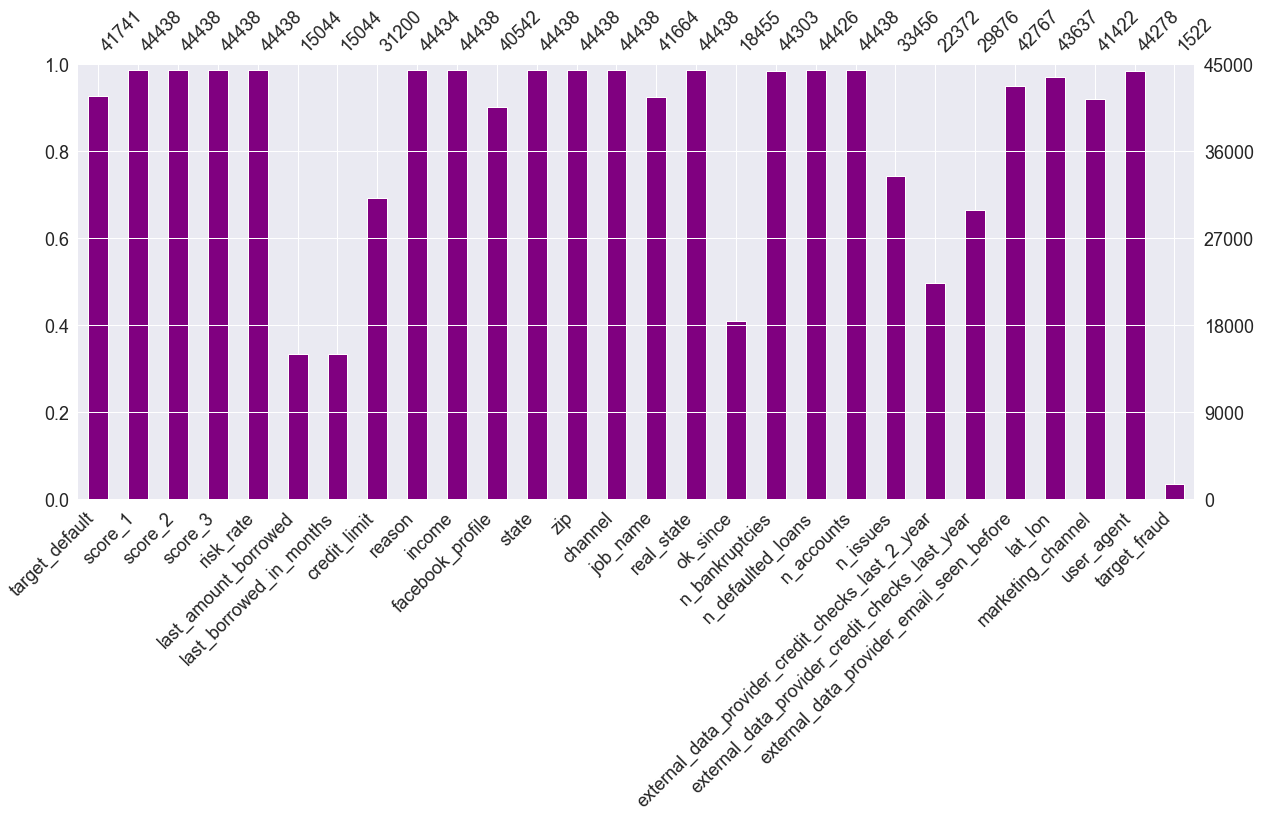

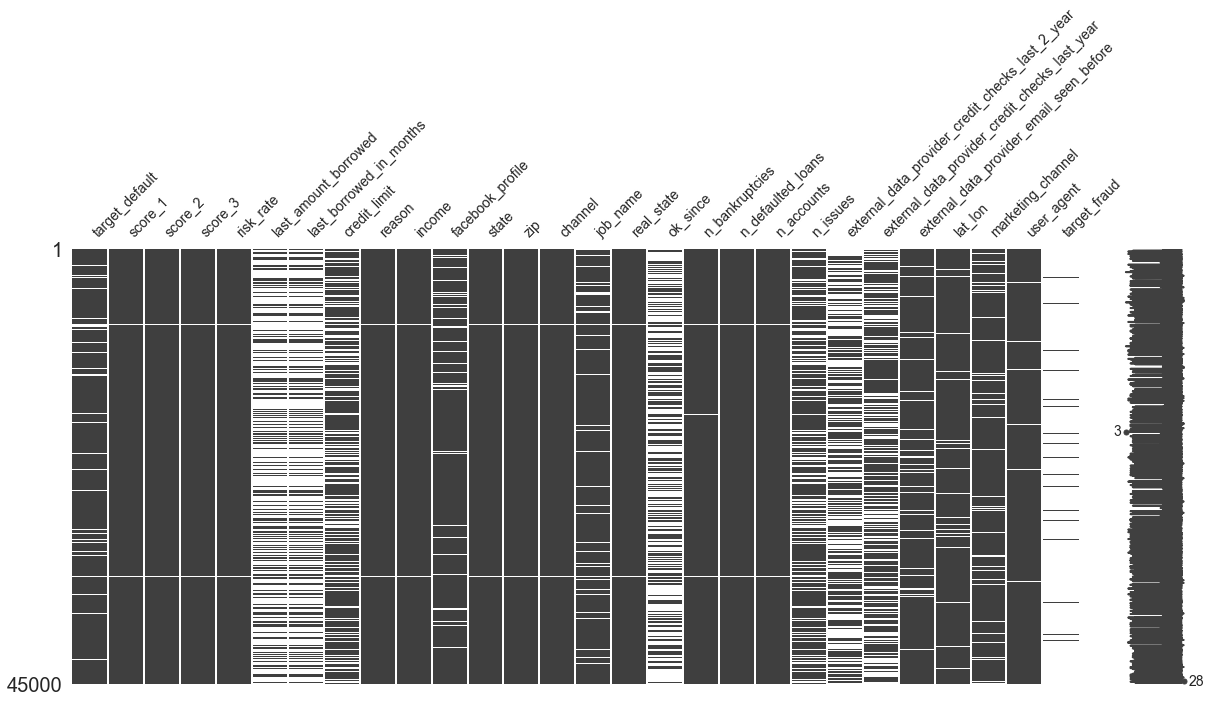

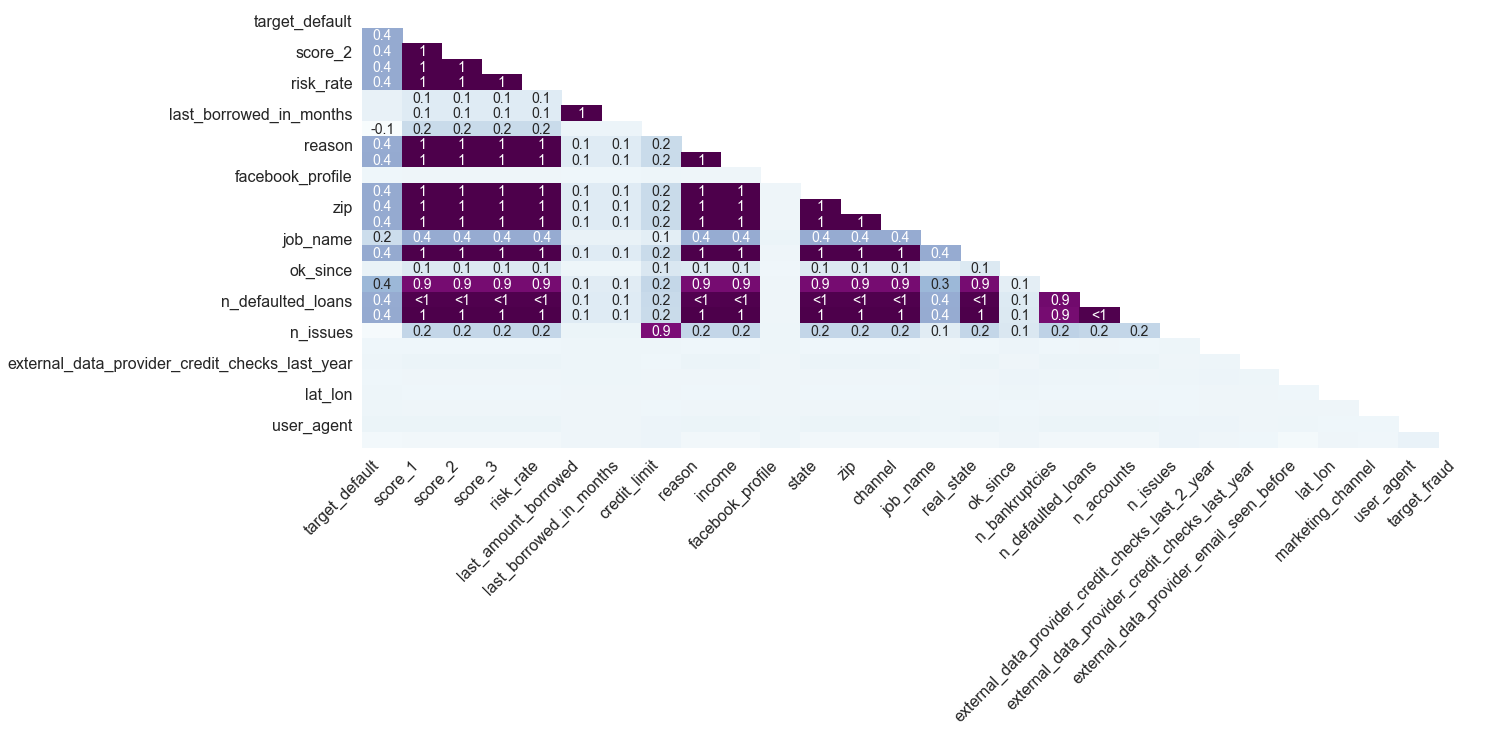

In [8]:
acquisition_missing_value_columns = acquisition.columns[acquisition.isnull().any()].tolist()
aquisition_missing = acquisition[acquisition_missing_value_columns]

msno.bar(aquisition_missing,figsize=(20,8),color=default_color,fontsize=18,labels=True)
msno.matrix(aquisition_missing,figsize=(20,8),fontsize=14)
msno.heatmap(aquisition_missing,figsize=(20,8),cmap=colormap)

### 0.4- Pearson correlation matrix

<Figure size 1296x1152 with 0 Axes>

Text(0.5,1.05,'Pearson correlation of continuous features')

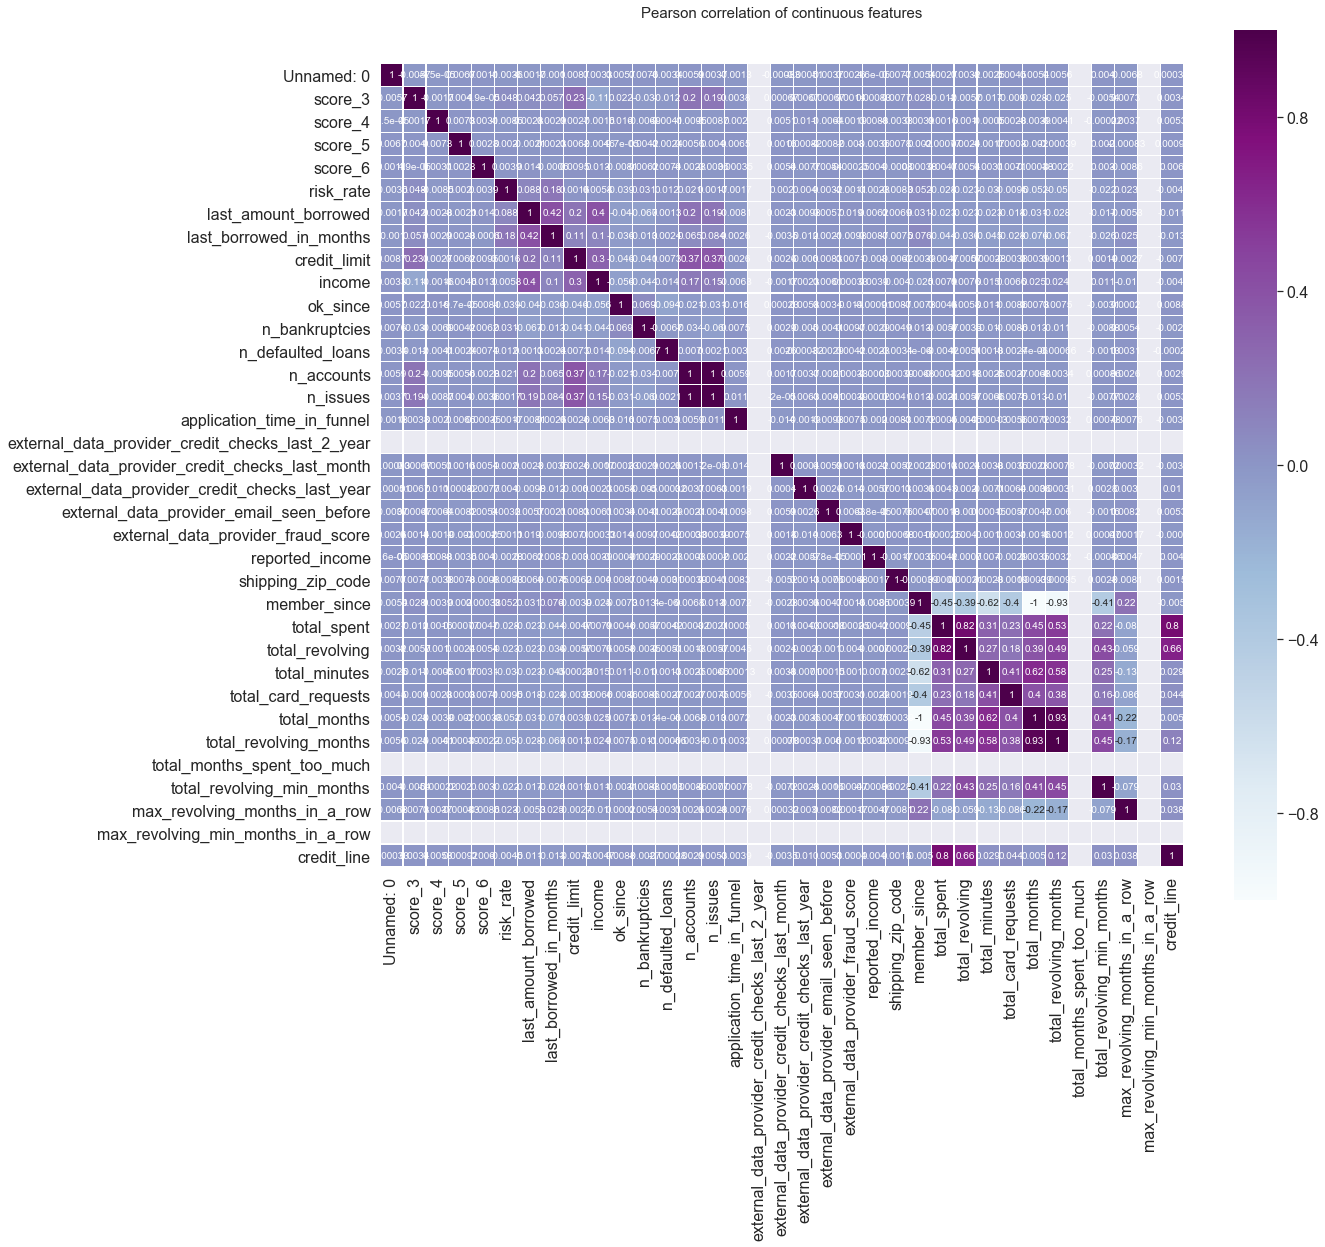

In [9]:
plt.figure(figsize=(18,16))
plt.title('Pearson correlation of continuous features', y=1.05, size=15)
sns.heatmap(acquisition.corr(),linewidths=0.1,vmax=1.0, square=True, cmap=colormap, linecolor='white', annot=True)

## 1- Acquisition data - Fraud Analysis

AxesSubplot(0.125,0.125;0.775x0.755)


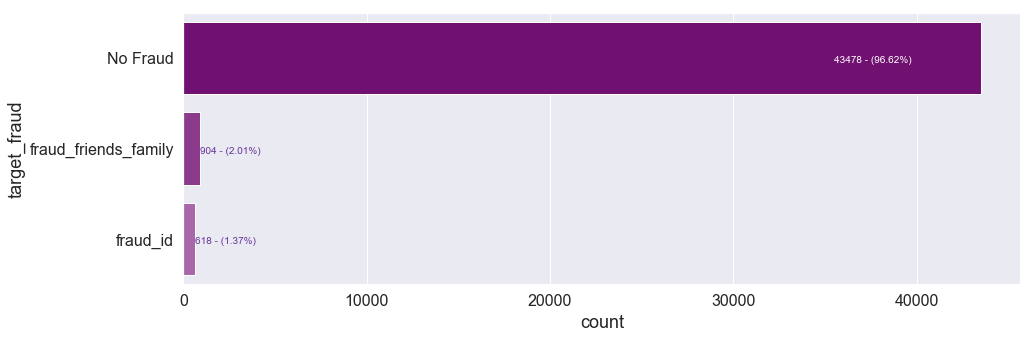

In [10]:
plot_count(acquisition, 'target_fraud', null_replace='No Fraud', x_adjust=8000)

## 2- Acquisition data - Default Analysis

AxesSubplot(0.125,0.125;0.775x0.755)


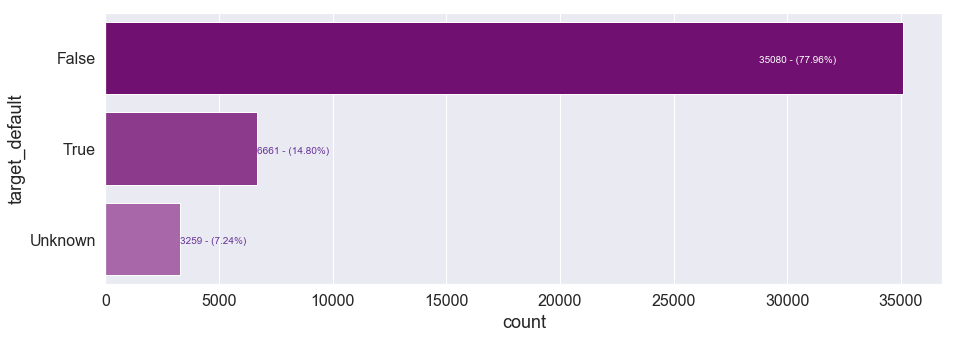

In [11]:
plot_count(acquisition, 'target_default', null_replace='Unknown', x_adjust=6300)

### 2.1- Unkown data
There is a small number of observations on our dataset wich we don't know if was defaulted or not, let's exclude them

AxesSubplot(0.125,0.125;0.775x0.755)


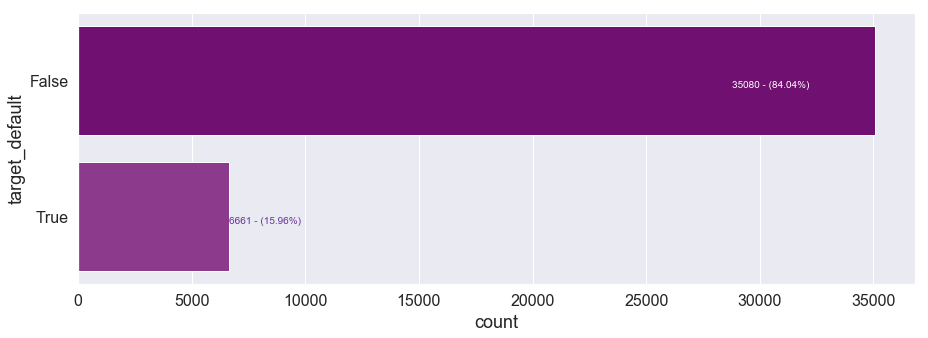

In [12]:
acquisition.dropna(subset=['target_default'], inplace=True)
plot_count(acquisition, 'target_default', null_replace='Unknown', x_adjust=6300)

### 2.2- Probability of Default (PD) - Naive Approach

As a naive approach, we can consider as PD the current percent of default (15.96%).

In [13]:
# acquisition_default = acquisition_without_fraud[acquisition_without_fraud['target_default'] == True]['ids'].count()
# acquisition_ok = acquisition_without_fraud[acquisition_without_fraud['target_default'] == False]['ids'].count()
# naive_pd = acquisition_default / (acquisition_default + acquisition_ok)

## 3- Deeper default analysis

Let's take a close look into the default data, so let's separate only default data into another dataframe.

In [14]:
default = acquisition[acquisition['target_default']]

### 3.1 - Default history

As we can see, most of the defaulters had not previously been defaulters, nor had they faced bankruptcy, and only a small minority had previously borrowed.

AxesSubplot(0.125,0.125;0.775x0.755)
AxesSubplot(0.125,0.125;0.775x0.755)
AxesSubplot(0.125,0.125;0.775x0.755)


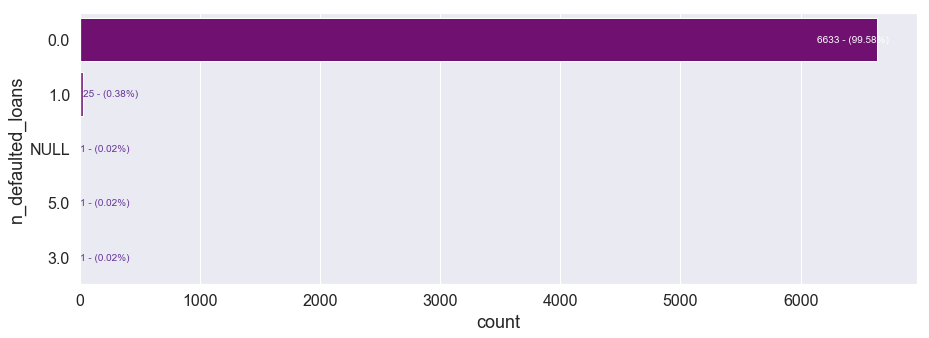

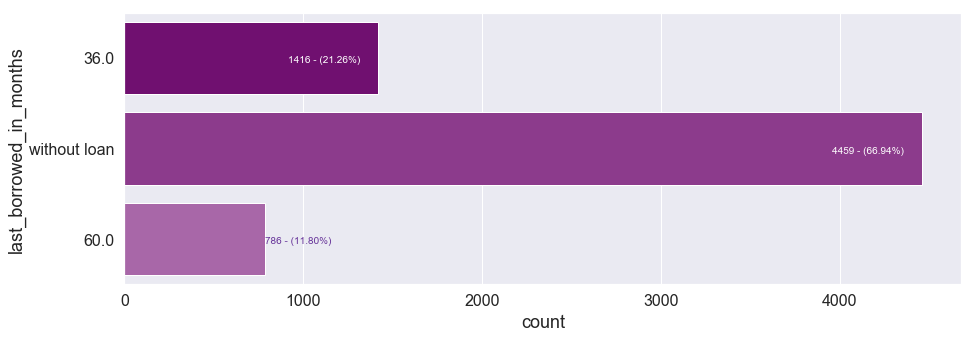

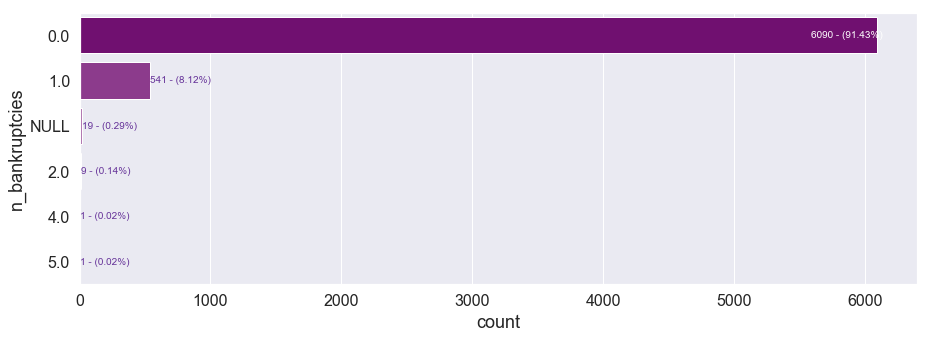

In [15]:
plot_count(default, 'n_defaulted_loans', x_adjust=500)
plot_count(default, 'last_borrowed_in_months', null_replace='without loan', x_adjust=500)
plot_count(default, 'n_bankruptcies', x_adjust=500)

### 3.2 - Income

Let's analyse the default against the income

AxesSubplot(0.125,0.125;0.775x0.755)


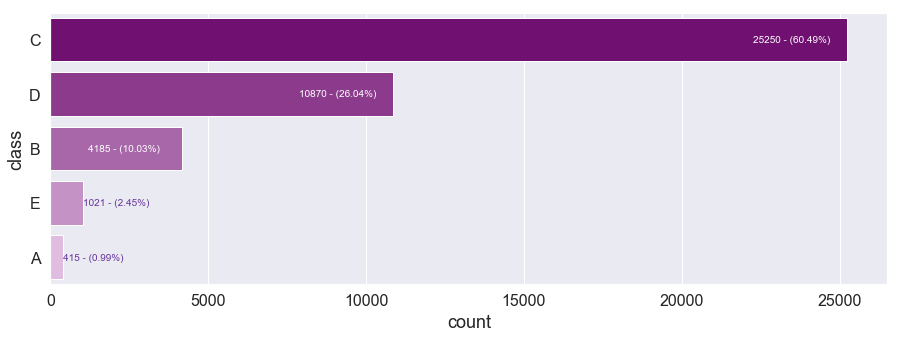

In [16]:
plot_count(acquisition, 'class', x_adjust=3000)

AxesSubplot(0.125,0.125;0.775x0.755)


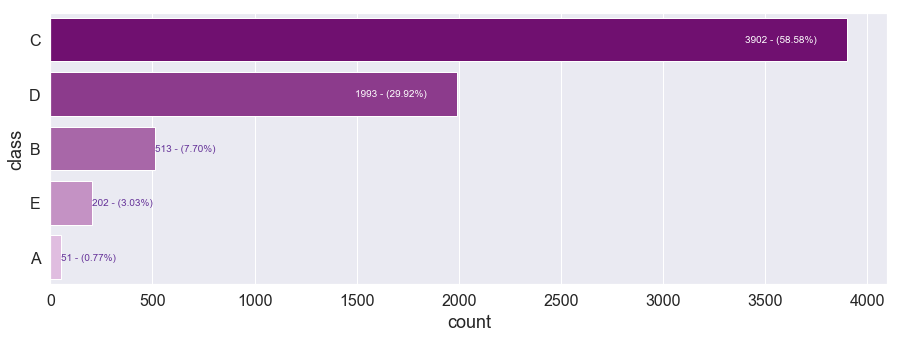

In [17]:
plot_count(default, 'class', x_adjust=500)

### 3.3 - Scores and Risk Analysis

As we can see, even looking at scores and risk analysis we have much similar data distribution defaulted and general application. This shows us how much this is an challenging task.

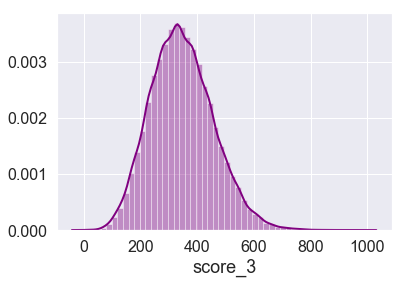

In [18]:
sns.distplot(acquisition['score_3'])

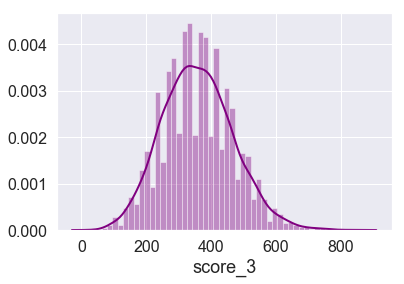

In [19]:
sns.distplot(default['score_3'])

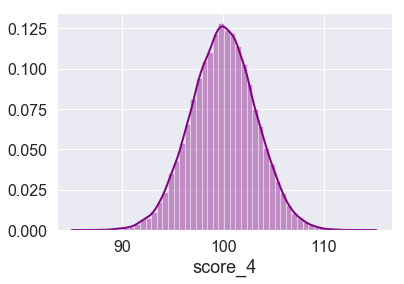

In [20]:
sns.distplot(acquisition['score_4'])

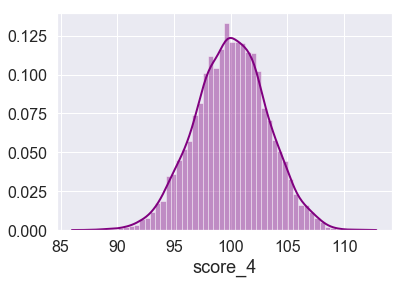

In [21]:
sns.distplot(default['score_4'])

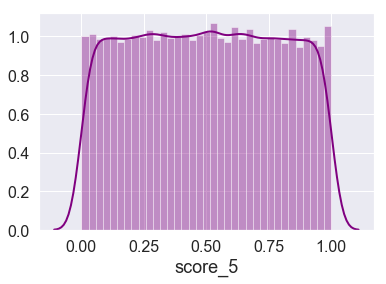

In [22]:
sns.distplot(acquisition['score_5'])

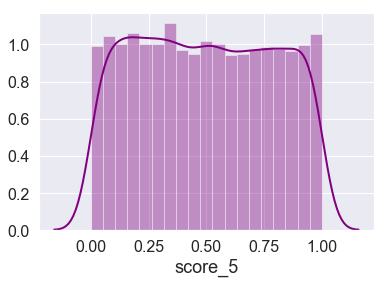

In [23]:
sns.distplot(default['score_5'])

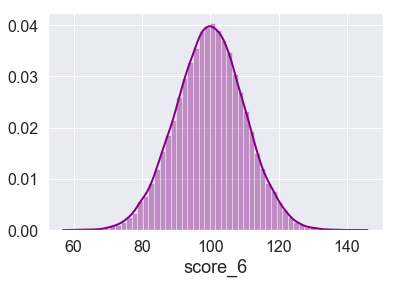

In [24]:
sns.distplot(acquisition['score_6'])

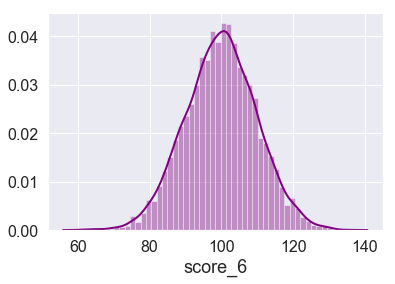

In [25]:
sns.distplot(default['score_6'])

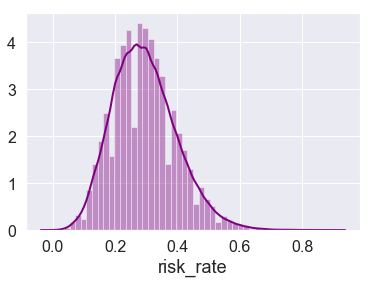

In [26]:
sns.distplot(acquisition['risk_rate'])

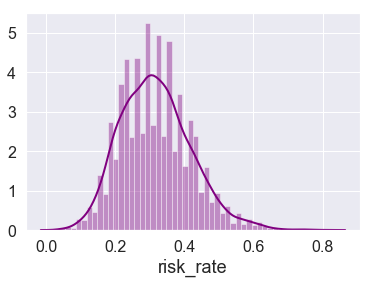

In [27]:
sns.distplot(default['risk_rate'])

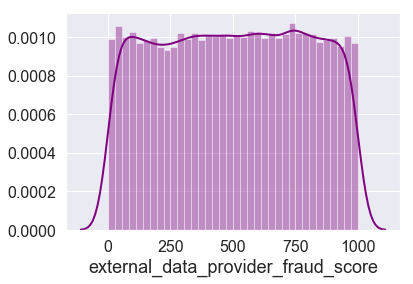

In [28]:
sns.distplot(acquisition['external_data_provider_fraud_score'])

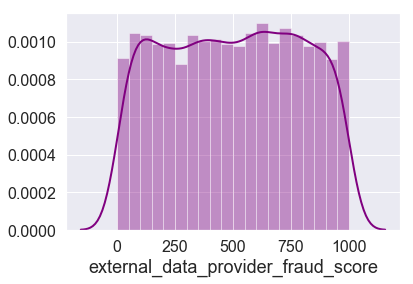

In [29]:
sns.distplot(default['external_data_provider_fraud_score'])

### 3.4 - Shipping state analysis
Let's take a look into the shipping state and compare if there is more frauds where we havo more customers too.

AxesSubplot(0.125,0.125;0.775x0.755)


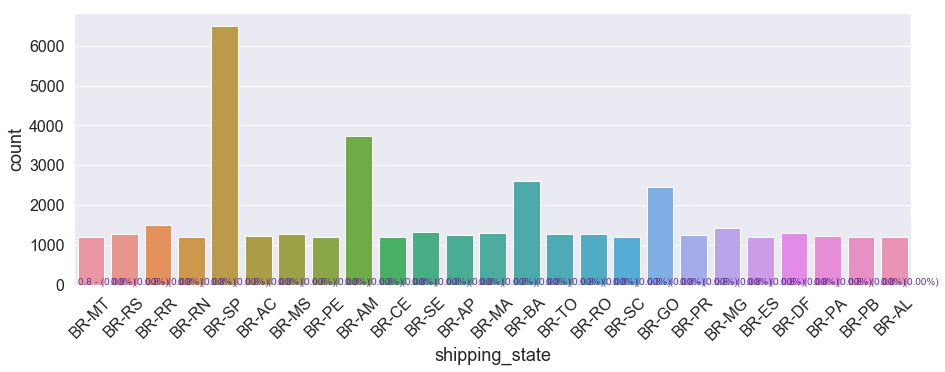

In [30]:
plot_count_v(acquisition, 'shipping_state', x_adjust=500)

AxesSubplot(0.125,0.125;0.775x0.755)


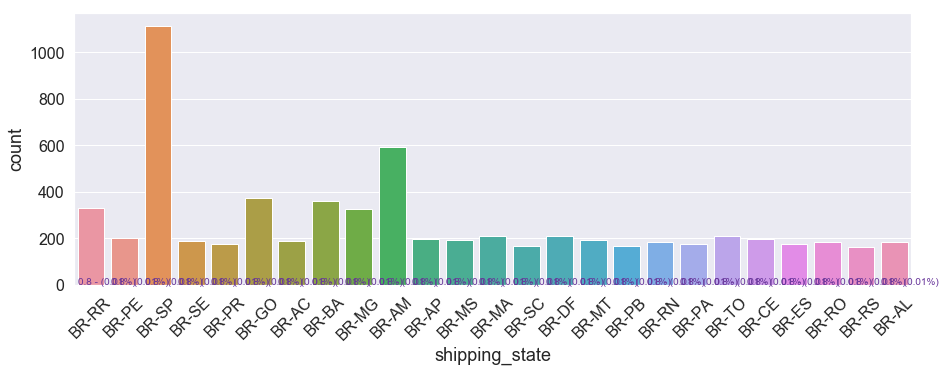

In [31]:
plot_count_v(default, 'shipping_state', x_adjust=500)

## 4- Fraud vs Default

Let's take a look into only the subset of our data that refers to fraud. How the default is present in this piece of data?

AxesSubplot(0.125,0.125;0.775x0.755)


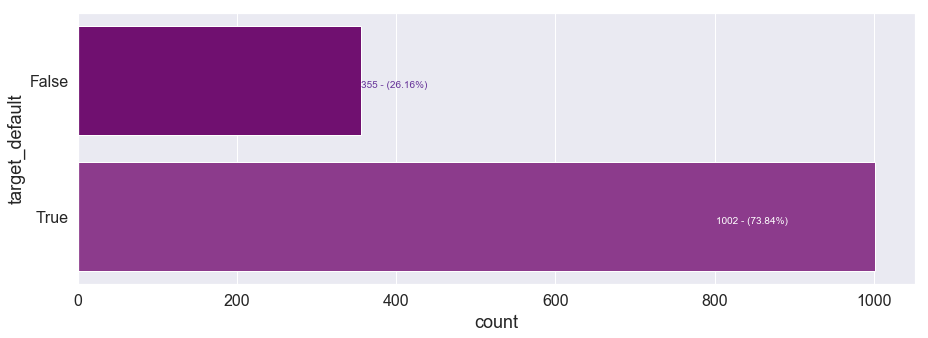

In [32]:
acquisition_fraud = acquisition.dropna(subset=['target_fraud'], inplace=False)
plot_count(acquisition_fraud, 'target_default', null_replace='Unknown', x_adjust=200)

### 4.1- Default without fraud

As we can see, almost 74% of our frauds end in default. What is an expected behavior.

We need to take care of removing fraud cases from our analysis when talking about default. Makes no sense trying to predict the probability of default (PD) when dealing with a fraud case, once we already know most of the frauds are made with intention of default. 

Ideally, the fraud analysis will run before the PD analysis, so a default caused by a fraud is, first of all, a mistake in fraud analysis.

From this point on, when analyzing PD, we will always look for a view of the dataset without fraud.

AxesSubplot(0.125,0.125;0.775x0.755)


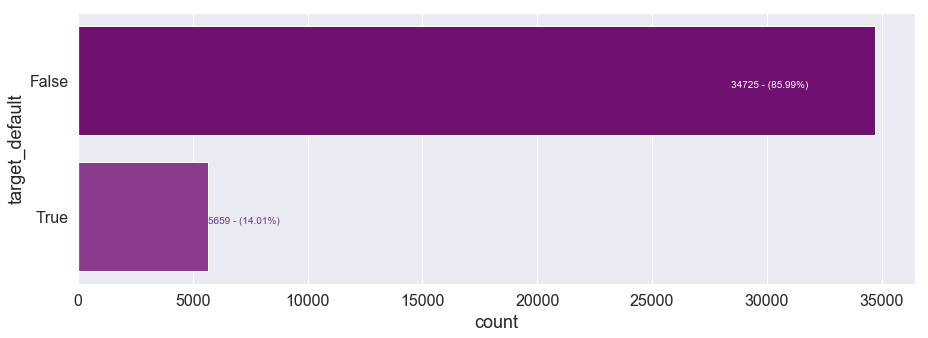

In [33]:
acquisition_without_fraud = acquisition[acquisition['target_fraud'].isnull()]
plot_count(acquisition_without_fraud, 'target_default', null_replace='Unknown', x_adjust=6300)

## 5- Customers

### 5.1- Evolution of customers in time

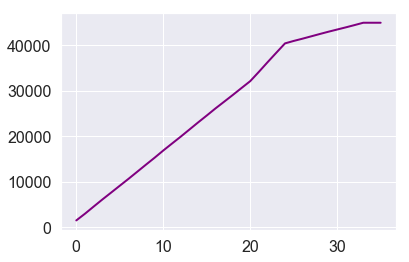

In [34]:
# TODO: acertar labels
sns.lineplot(data=spend['normalized_month'].value_counts(), markers=True, legend='full')

### 5.2- How many customers were approved by month
It appears that a mistake was made on month 20th and many customers have been approved, and now to compensate customers are being approved less than normal

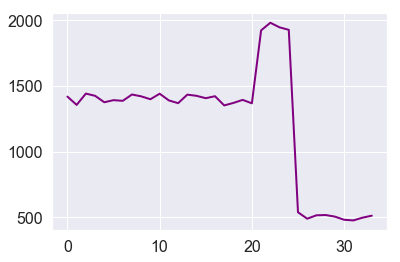

In [35]:
sns.lineplot(data=acquisition['member_since'].value_counts(), markers=True, legend='full')

### 5.3- How many customers approved became defaulters

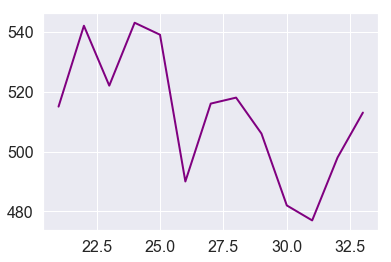

In [36]:
sns.lineplot(data=default['member_since'].value_counts(), markers=True, legend='full')